<a href="https://colab.research.google.com/github/SidddhantJain/Machine-Learning-Lab/blob/main/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset (1)/Housing.csv")
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill missing values with mode for categorical and median for numerical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
price               0
area                0
bedrooms            0
bathrooms           0
stories    

<ipython-input-21-43310c312772>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-21-43310c312772>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [22]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Splitting data
X = df.drop(columns=["price"])  # 'price' is the target column
y = df["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
clf = DecisionTreeRegressor(criterion="squared_error", random_state=42)  # Use regression for continuous target
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [23]:
y_pred = clf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 2642802637614.6787
R² Score: 0.4771459275854347


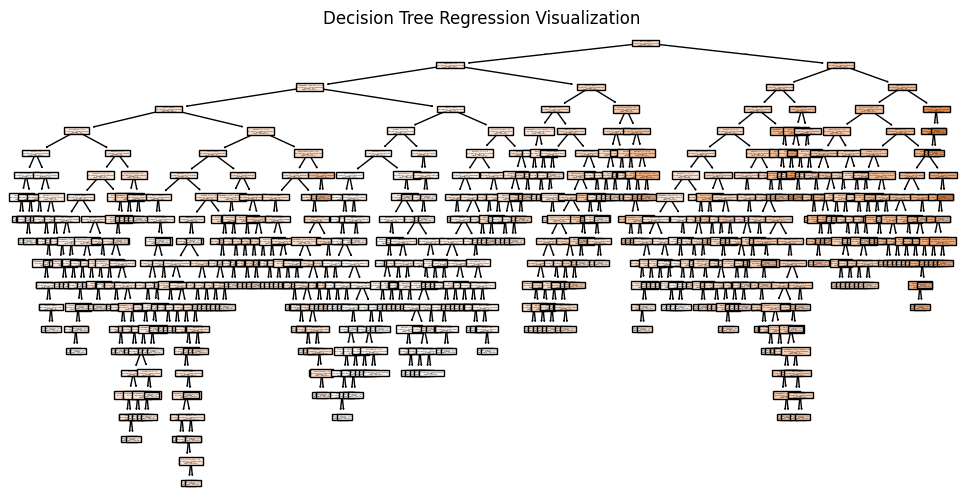

In [24]:

# Visualization of Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, filled=True)
plt.title("Decision Tree Regression Visualization")
plt.show()

In [25]:

# Compute entropy
def calculate_entropy(y):
    class_counts = np.bincount(y)
    probabilities = class_counts / len(y)
    return entropy(probabilities, base=2)

print("Dataset Entropy:", calculate_entropy(y))

Dataset Entropy: 7.286836069599917


In [26]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [27]:

# Predictions
y_pred = clf.predict(X_test)

# Accuracy evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.0000
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

     1750000       0.00      0.00      0.00       1.0
     1820000       0.00      0.00      0.00       1.0
     1890000       0.00      0.00      0.00       2.0
     2100000       0.00      0.00      0.00       1.0
     2233000       0.00      0.00      0.00       1.0
     2275000       0.00      0.00      0.00       1.0
     2310000       0.00      0.00      0.00       0.0
     2345000       0.00      0.00      0.00       0.0
     2380000       0.00      0.00      0.00       1.0
     2408000       0.00      0.00      0.00       0.0
     2450000       0.00      0.00      0.00       2.0
     2520000       0.00      0.00      0.00       1.0
     2660000       0.00      0.00      0.00       4.0
     2695000       0.00      0.00      0.00       0.0
     2730

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

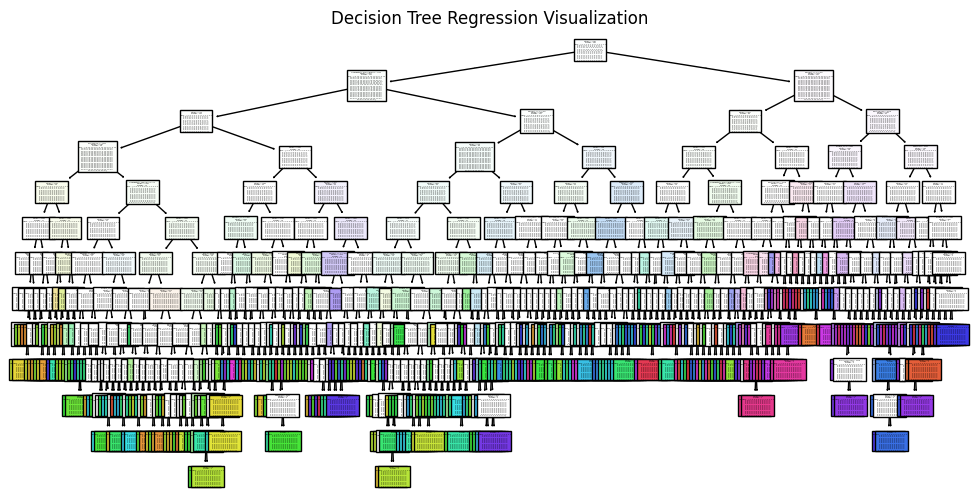

In [28]:
# Decision Tree Visualization
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, filled=True)  # Removed class_names
plt.title("Decision Tree Regression Visualization")
plt.show()


In [29]:

# Compute entropy
def calculate_entropy(y):
    class_counts = np.bincount(y)
    probabilities = class_counts / len(y)
    return entropy(probabilities, base=2)

print("Dataset Entropy:", calculate_entropy(y))

Dataset Entropy: 7.286836069599917
